# UMAP transfer can be used as a preprocess, then base the embedding, you can make extra process

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})
digits = load_digits()#1797 hand writing data.

In [3]:
# Cut data in train and test. train_test_split default will split in ratio 3:1
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

### Let's try a Support Vector Cluster and KNN Cluster. 
Both of them can be loaded from sklearn directly, no extra codes.

In [4]:
%%time
svc = SVC(gamma = 'auto').fit(X_train, y_train) # Must define gamma as auto do decrease perfomance.
knn = KNeighborsClassifier().fit(X_train, y_train)

CPU times: total: 453 ms
Wall time: 456 ms


In [5]:
# show result of svc and knn.
svc.score(X_test, y_test), knn.score(X_test, y_test)

(0.62, 0.9844444444444445)

### **Use UMAP to preproduce data, then do cluster, performance will increase a lot.**

In [6]:
import umap
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train) # data transformer. Transformed data saved in trans.embedding_
# trans here is also a projection, to project highdim data to local, 2D embedding space.

<AxesSubplot:>

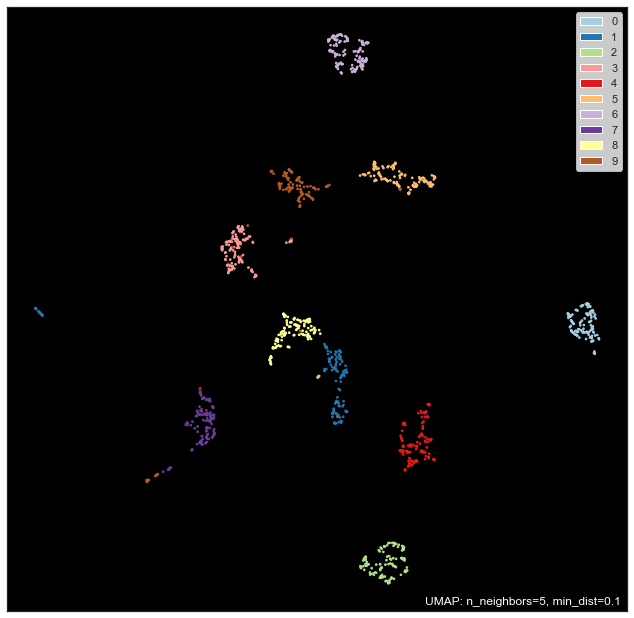

In [54]:
# Use umap.plot function to generate beautiful graph.
import umap.plot
umap.plot.points(trans, labels=y_train, color_key_cmap='Paired', background='black')

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

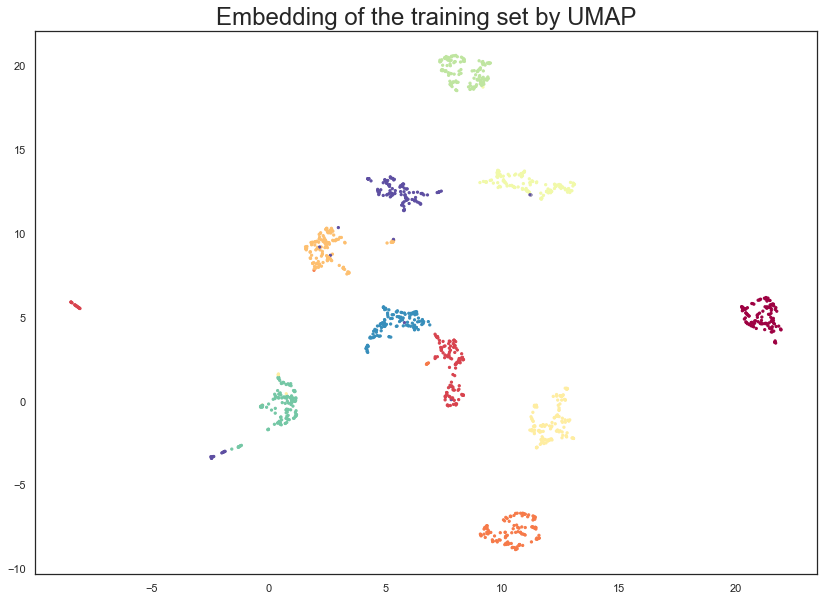

In [47]:
# graph can also plot through trans.embedding_ directly.
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24)

In [59]:
# Transfer embedding data directly to model
svc = SVC(gamma = 'auto').fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

# till now, the model haven't seem test data.
#We can direct transform test data into model.
%time test_embedding = trans.transform(X_test)

CPU times: total: 2.11 s
Wall time: 2.14 s


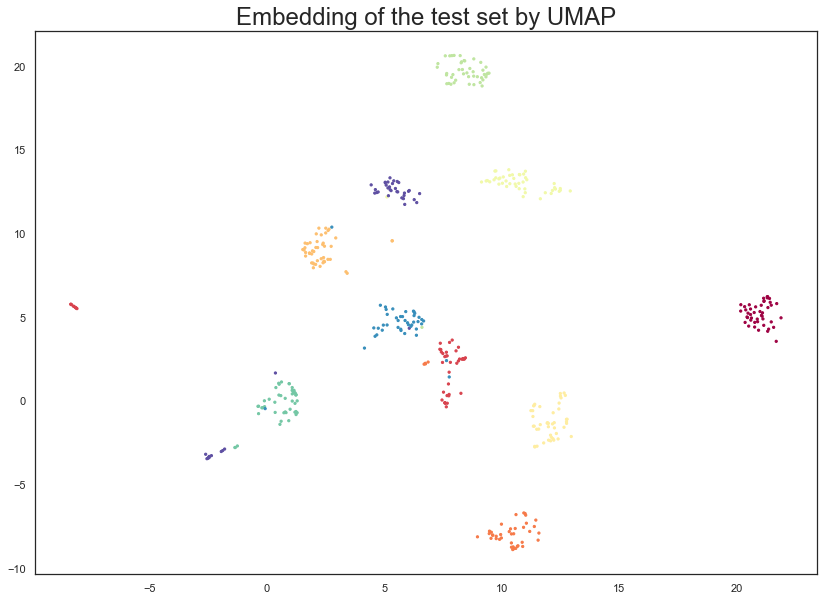

In [63]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

In [67]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)

(0.9822222222222222, 0.9822222222222222)

## For more complex dataset, embedding in higher dimension is also possible. 
### This might help cluster, but visualization is not possible for dim bigger than 3.

In [68]:
trans = umap.UMAP(n_neighbors=5, n_components=10, random_state=42).fit(X_train)
svc = SVC(gamma = 'auto').fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)


(0.9733333333333334, 0.9822222222222222)

In [69]:
trans.embedding_.shape

(1347, 10)